<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA</center></h1>

# BetaZero

1. Baran Deniz Korkmaz - 2015400183
2. Doğukan Kalkan - 2015400132

# Imported Packages
This section introduces the imported packages, as they are the initial requirements for the implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sp
import numpy.linalg as linalg

# Auxiliary Resources
This section contains the auxiliary functions that we utilize for the implementation.

# 1. K-Means Resources
This section introduces the auxiliary functions that we use in the implementation of K-Means Algorithm.

## a.k_means(data,k,N):
Description: Performs a K-Means Clustering for the given data.

Parameters:
1. data: The data.
2. k: The number of clusters
3. N: The maximum number of iterations.

Implementation Details: Starts with initializing the centroids. Reassigns all the data points to the correct clusters and recomputes the centroids. 

Return Values: 
1. centroids: A list of center points
2. labels: A list that contains the cluster numbers for data points.

In [2]:
def k_means(data,k,N):
    np.random.seed(1)
    x_min, x_max, y_min, y_max = get_range(data)
    centroids = get_initial_centroids(k,x_min,x_max,y_min,y_max)
    labels = list()
    for i in range(N):
        labels = get_clusters(data,centroids)
        centroids = get_centroids(k,data,labels)
    return centroids, labels

## b.get_range(data):
Description: An auxiliary function to determine the range for the initialization of centroids in K-Means Algorithm.

Parameters:
1. data: The data

Implementation Details: Takes the data, and finds the minimum and maximum coordinates of all the data points.

Return Values: 
1. x_min: The minimum value of x coordinates. 
2. x_max: The maximum value of x coordinates.
3. y_min: The minimum value of y coordinates.
4. y_max: The maximum value of y coordinates.

In [3]:
def get_range(data):
    data_t = np.transpose(data)
    x_min, x_max = min(data_t[0]),max(data_t[0])
    y_min, y_max = min(data_t[1]),max(data_t[1])
    return x_min, x_max, y_min, y_max

## c.get_initial_centroids(k,x_min,x_max,y_min,y_max):
Description: Determines the initial centroids for K-Means.

Parameters:
1. k: The number of clusters
2. x_min: The minimum value of x coordinates. 
3. x_max: The maximum value of x coordinates.
4. y_min: The minimum value of y coordinates.
5. y_max: The maximum value of y coordinates.

Implementation Details: Creates k centroids whose x coordinates and y coordinates are randomly determined. The x coordinates are between x_min and x_max and the y coordinates are between y_min and y_max to regularize the initial centroids.

Return Values:
1. centroids: A list of center points

In [4]:
def get_initial_centroids(k,x_min,x_max,y_min,y_max):
    centroids = []
    for i in range(k):
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        centroids.append((x,y))
    return centroids

## d.get_clusters(data,centroids):
Description: Determines the cluster number for each data point

Parameters:
1. data: The data
2. centroids: A list of centroids

Implementation Details: Calculates the Euclidean distance of each point to all the centroids and puts the data point into the cluster whose centroid is the centroid to which the data points is closest.

Return Values: 
1. labels:  A list that contains the cluster numbers for data points.

In [5]:
def get_clusters(data,centroids):
    labels = list()
    for point in data:
        distance = list()
        for centroid in centroids:
            distance.append(linalg.norm(np.array(point)-np.array(centroid)))
        class_number = distance.index(min(distance))
        labels.append(class_number)
    return labels

## e.get_centroids(k,data,labels):
Description: Recomputes the centroids of each cluster.

Parameters:
1. k: The maximum number of iterations.
2. data: The data
3. labels: A list that contains the cluster numbers for data points.


Implementation Details: Calculates the average point in each cluster and makes it the centroid of that cluster.

Return Values: 
1. centroids: A list of new center points.

In [6]:
def get_centroids(k,data,labels):
    centroids = list()
    counts = np.zeros(k)
    for i in range(k):
        centroids.append((0.0,0.0))
    for point, y in zip(data, labels):
        tmp = list(centroids[y])
        tmp[0] += point[0]
        tmp[1] += point[1]
        centroids[y] = (tmp[0],tmp[1])
        counts[y] += 1
    for i in range(len(centroids)):
        tmp = list(centroids[i])
        tmp[0] = tmp[0] /counts[i]
        tmp[1] = tmp[1] / counts[i]
        centroids[i] = (tmp[0],tmp[1])
    return centroids

# 2. PCA Resources
This section introduces the auxiliary functions that we use in the implementation of PCA Algorithm.

## a. standardize(data)
Description: Standardizes the given data.

Parameters:
1. data: Training data to be standardized.

Implementation Details: The function utilizes `numpy` package for mean and standard devation computations.

Return Values: 
1. data: Standardized Data

In [7]:
def standardize(data):
    data_t = np.transpose(data)
    for i,row in enumerate(data_t):
        mean = np.mean(row)
        stdev = np.std(row)
        for j,elem in enumerate(row):
            new_elem = (elem-mean)/stdev
            data[j][i] = new_elem
    return data

## b. get_eigen_vectors(data)
Description: Returns the eigenvectors of the covariance matrix computed by the given data in sorted order in terms of the magnitude of eigenvalues.

Parameters:
1. data: Training data

Implementation Details: The function utilizes auxiliary functions to standardize the provided training data and to compute covariance matrix. The package `linalg` is used to compute the eigenvectors of covariance matrix. The matrix of eigenvectors sorted by the eigenvalues is returned. 

Return Values: 
1. 2D Matrix of Eigenvectors sorted by the magnitude of corresponding eigenvalues.

In [8]:
def get_eigen_vectors(data):
    standardized_pca_data_x = standardize(data)
    covariance_matrix = np.transpose(standardized_pca_data_x).dot(np.array(standardized_pca_data_x))*(1.0/len(standardized_pca_data_x))

    results = linalg.eig(covariance_matrix)

    eigen_values = results[0]
    eigen_vectors = results[1]

    eigen_dict = {k: v for v, k in enumerate(eigen_values)}
    sorted_eigen_values = sorted(eigen_values,reverse=True)

    pc_matrix = []

    for eigen_value in sorted_eigen_values:
        eigen_index = eigen_dict[eigen_value]
        pc_matrix.append(eigen_vectors[:,eigen_index])

    return np.transpose(pc_matrix)

## c. get_transformation_matrices(eigen_vectors, d)
Description: Returns the list transformation matrices for corresponding dimensions provided in the list d.

Parameters:
1. eigen_vectors: 2D Matrix of Eigenvectors sorted by the magnitude of corresponding eigenvalues.
2. d: List of separate dimensions.

Return Values: 
1. transformation_matrices: List of 2D transformation matrices.

In [9]:
def get_transformation_matrices(eigen_vectors, d):
    transformation_matrices = []
    for current_d in d:
        transformation_matrices.append(eigen_vectors[:,0:current_d])
    return transformation_matrices

## d. pca(data,d)
Description: Returns the transformation matrices of the dimensions provided by the dimensionality list, d. 

Parameters:
1. data: Training data
2. d: List of separate dimensions.

Implementation Details: The function utilizes auxiliary function in order to compute eigen vectors of covariance matrix constucted using the data and to return the transformation matrices constructed by first d eigenvectors (principal components) corresponding into the elements provided in the list d.

Return Values: 
1. Transformation matrices for each dimension provided in the list d.

In [10]:
def pca(data, d):
    eigen_vectors = get_eigen_vectors(data)
    return get_transformation_matrices(eigen_vectors, d)

## e. transform_data(data, transformation_matrices)
Description: Returns the reconstructed matrices by applying transformation for each transformation matrix in the list `transformation_matrices` onto the original data.

Parameters:
1. data: Training data
2. transformation_matrices: List of 2D transformation matrices.

Return Values: 
1. reconstructed_matrices: List of reconstructed/transformed data matrices.

In [11]:
def transform_data(data, transformation_matrices):
    reconstructed_matrices = []
    for G in transformation_matrices:
        reconstructed_matrices.append(np.transpose(G.dot(np.transpose(G).dot(np.transpose(data)))))
    return reconstructed_matrices

# 3. Plotting Resources
This section introduces the auxiliary functions that we use to plot tables and charts.

In [12]:
color = ['r','b','g']
marker = ['o','o','o']

## a.scatter_plot_util(data,labels,ax):
Description: A scatter plot function to display the results of K-Means Clusters.

Parameters:
1. data: The data
2. labels: A list that contains the cluster numbers for data points.
3. ax: A subplot.

Implementation Details: Sorts the labels which contain the cluster numbers for data points and gives a different color for data points belonging to different clusters and displays it.

Return Values: 

In [13]:
def scatter_plot_util(data,labels,ax):
    distinct_labels = sorted(list(set(labels)))
    scatter_data = []
    for i in range(len(distinct_labels)):
        scatter_data.append([])
        for j in range(2):
            scatter_data[i].append([])
    for X,Y in zip(data,labels):
        class_index = distinct_labels.index(Y)
        scatter_data[class_index][0].append(X[0])
        scatter_data[class_index][1].append(X[1])
    for i in range(len(distinct_labels)):
        ax.scatter(scatter_data[i][0],scatter_data[i][1],c=color[i],marker=marker[i],label='Class ' + str(distinct_labels[i]))

## b. information_loss_plot(information_loss,d)
Description: Plots the information loss versus dimension plots.

Parameters:
1. information_loss: List of information loss values.
2. d: List of dimensions.

In [14]:
def information_loss_plot(information_loss,d):
    information_loss_rounded = [round(elem,3) for elem in information_loss]
    x = np.arange(len(d))  # the label locations
    width = 0.5  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, information_loss_rounded, width, label='Information Loss')
    ax.set_ylabel('Information Loss')
    ax.set_xlabel('d: New Dimensionality')
    ax.set_title('Information Loss vs d (New Dimensionality)')
    ax.set_xticks(x)
    ax.set_xticklabels(d)
    ax.legend()
    autolabel(rects1, ax)
    fig.tight_layout()
    plt.show()

## c. autolabel(rects,ax):
Description: Puts the y value on top of each bar.

Parameters:
1. rects: Bars.
2. ax: A plot.

In [15]:
# REFERENCE: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def autolabel(rects,ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Introduction

The project aims to present a theoretical and practical basis for two fundamental unsupervised learning algorithms, k-means clustering and principal component analysis. In the notebook, the reader will be largely provided by practical applications and approaches. Please refer to the project report for detailed explanations about theoretical aspects.

# Task 1: K-Means Clustering
K-means Clustering is a unsupervised learning technique in which the data is divided into K clusters each of which has a centroid(i.e. center point). The data points in the data set are assigned to the cluster whose centroid is the closest centroid to those points. 
For detailed explanation, please refer to the report.

We start with loading our data set and corresponding labels.

In [16]:
N = [1,2,3,4,5,6,7,8,9]

kmeans_data = np.load("data.npy")
kmeans_labels = np.load("label.npy")

## Task 1.1: Plot Clusters
In this section, we just plot the data that is loaded above.

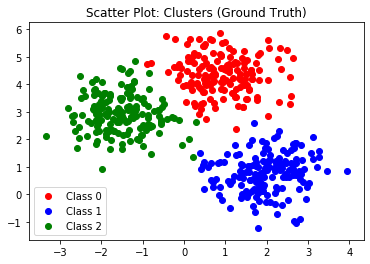

In [17]:
# 1.1
fig = plt.figure()
ax = fig.add_subplot(111)
scatter_plot_util(kmeans_data,kmeans_labels,ax)
ax.set_title("Scatter Plot: Clusters (Ground Truth)")
ax.legend(loc='lower left')
plt.show()

## Task 1.2: K-Means Implementation
In this section, we just run our function, k_means with the maximum number of iterations, N=12 and the number of cluster, k=3.


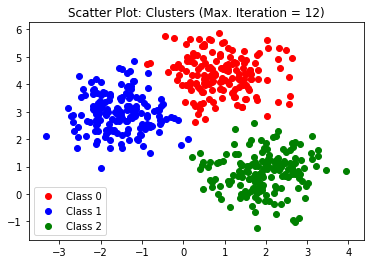

In [18]:
# 1.2
# RUN K-MEANS FOR N=12
_,cluster_labels = k_means(kmeans_data,k=3,N=12)
# PLOT
fig = plt.figure()
ax = fig.add_subplot(111)
scatter_plot_util(kmeans_data,cluster_labels,ax)
ax.set_title("Scatter Plot: Clusters (Max. Iteration = 12)")
ax.legend(loc='lower left')
plt.show()

## Taks 1.3: Evaluation
In this section, we run our algorithm with different number of iterations, N = 1,2,3...,9 and display the results in a 3x3 plot. 


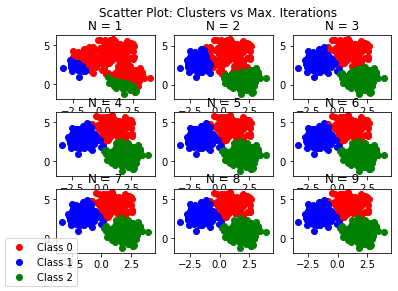

In [19]:
# 1.3
fig = plt.figure()
plt.suptitle("Scatter Plot: Clusters vs Max. Iterations")
for i,max_iter in enumerate(N):
    ax = fig.add_subplot(3,3,i+1)
    _,cluster_labels = k_means(kmeans_data,k=3,N=max_iter)
    scatter_plot_util(kmeans_data,cluster_labels,ax)
    ax.set_title("N = " + str(max_iter))
    if i==len(N)-1:
        handles, legend_labels = ax.get_legend_handles_labels()
        fig.legend(handles, legend_labels, loc='lower left')
plt.show()

Observing the figure above, the convergence is satisfied for N=4, that is, the final solution is obtained when the K-means clustering algorithm has run for 4 times.

# Task 2: Principal Component Analysis (PCA)


Principal component analysis is a fundamental dimensionality reduction algorithm. The principal component analysis takes advantage of linear algebra, by extracting the eigenvectors provided by the covariance matrix of the training data set. The algorithm aims at preserving the significant information presented in terms of variance.

Initially, we import our dataset provided by `USPS.mat` using `loadmat`. The `USPS` data set consists of 3000 images of 256 pixels, resulting in a 2-dimensional matrix of size 3000*256 .

In [20]:
#
# TASK 2: PCA
#
pca_data = sp.loadmat("USPS.mat")
pca_data_x = pca_data['A']
pca_data_y = pca_data['L']

## Task 2.1: PCA Implementation


In this section, we implement the pca algorithm. Please refer to the section `Auxiliary Resources` for the implementation of pca algorithm. Plus, further information will be provided in the report.

Let us introduce the pseudocode for PCA algorithm as follows:

1. Main Step: Extraction of Principal Components:

    1.1 Standardize the data set $X \in R^{N*p}$
    
    1.2 Form the covariance matrix.
    
    1.3 Compute the eigenvectors of covariance matrix.
    
    1.4 Use first d eigenvectors with largest d eigenvalues.
    
    1.5 Form the transformation matrix.
    
2. Apply transformation onto the original data set to obtain reconstructed matrix.

Please notice that, the implementation of pca algorithm intentionally does differ practically, but not theoretically from the procedure stated above. Our goal is to make just one pca call for a given list of dimensions in order to save runtime. Therefore, our practical implementation slightly differs which does not cause any deviation from the theory. More explicitly, instead of taking a single dimension value as parameter, our implementation takes a list of dimensions, and returns the corresponding transformation matrices by computing the eigenvectors only once.

In [21]:
#
# TASK 2.1
#
d = [50, 100, 200]
transformation_matrices = pca(pca_data_x, d)

## Task 2.2: Image Reconstruction


In this section we apply the transformation onto the original data by the transformation matrices derived from PCA. The rows of each matrices consists of images of d pixels where d is a predetermined hyperparameter, standing for the number of features extracted.

In [22]:
#
# TASK 2.2
#
reconstructed_matrices = transform_data(pca_data_x, transformation_matrices)

## Task 2.3: Evaluation


This section provides the evaluation of PCA implementation by analyzing the reconstructed images varying per changing number of features extracted.

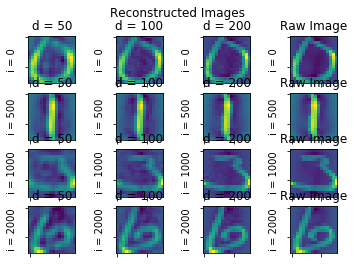

In [23]:
#
# TASK 2.3
#
image_indices = [0, 500, 1000, 2000]

fig = plt.figure()
plt.suptitle("Reconstructed Images")
for i,image_index in enumerate(image_indices):
    for j,reconstructed_matrix in enumerate(reconstructed_matrices):
        ax = fig.add_subplot(4,4,i*4+j+1)
        ax.imshow(reconstructed_matrix[image_index].reshape(16,16))
        ax.set_title('d = ' + str(d[j]))
        ax.set_ylabel('i = ' + str(image_index))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax = fig.add_subplot(4,4,4*(i+1))
    ax.imshow(pca_data_x[image_index].reshape(16,16))
    ax.set_title('Raw Image')
    ax.set_ylabel('i = ' + str(image_index))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

Observing the figures above, we conclude that our experimental results are compatible with theoretical expectations. As the number of features used in transformation increases, the information loss diminishes. Above, we see that as we move towards the direction in increasing d, the blur within the images decreases, approaching into the original raw image. Hence, we can conclude that our practical observations are valid.

## Appendix

### A1. Analysis of Information Loss

This section provides an extra work on the analysis of information loss by changing new dimension reduced. The computation is based on the difference between the original data matrix and reconstructed matrix per dimension.

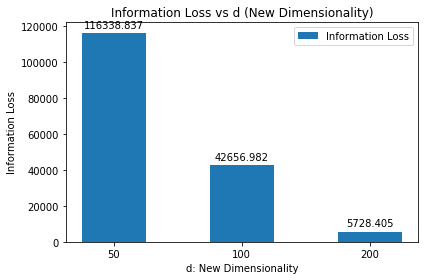

In [24]:
information_loss = list()
for current_d,reconstructed_matrix in zip(d,reconstructed_matrices):
    information_loss.append(linalg.norm(pca_data_x - reconstructed_matrix,ord='fro')**2)
information_loss_plot(information_loss,d)

Observing the plot, again, we end up with experimental results that are compatible with our theoretical expectations. As new dimension increases, the information loss becomes smaller.

## References
* Lecture Slides
* https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
